## class imbalance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, stratify=y, random_state=0)

In [3]:
np.unique(y_train, return_counts=True)

(array([False,  True]), array([1212,  135], dtype=int64))

#### None

In [4]:
tree = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
y_test_hat = tree.predict(X_test)

Test score: 0.97
Test f1 score: 0.83
[[401   4]
 [ 10  35]]
AUC : 0.8839506172839506


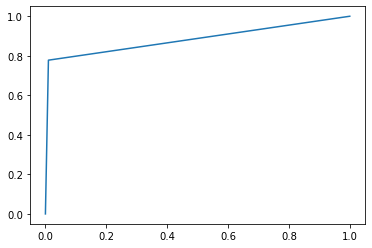

In [5]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### Cost sensitive

In [15]:
tree = DecisionTreeClassifier(max_depth=20, class_weight='balanced').fit(X_train, y_train)
y_test_hat = tree.predict(X_test)

Test score: 0.96
Test f1 score: 0.80
[[396   9]
 [  9  36]]
AUC : 0.8888888888888888


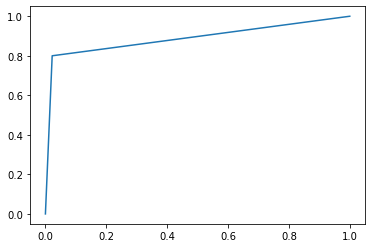

In [16]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### Random Oversampling

In [18]:
'''TO DO'''
over_no = y_train.sum()*9

In [19]:
y_train.nonzero()

(array([   1,   13,   18,   31,   50,   59,   60,   74,   77,   80,   82,
         105,  121,  131,  137,  140,  144,  150,  154,  160,  177,  182,
         184,  203,  221,  223,  229,  242,  264,  299,  307,  322,  326,
         350,  357,  359,  363,  374,  381,  386,  409,  426,  439,  449,
         488,  503,  507,  518,  521,  522,  526,  539,  558,  560,  574,
         584,  586,  603,  606,  616,  620,  629,  651,  654,  659,  672,
         680,  721,  748,  754,  756,  761,  774,  777,  782,  786,  803,
         827,  829,  832,  833,  856,  860,  868,  877,  894,  895,  902,
         914,  947,  959,  966,  989,  990,  992,  993,  995,  997,  999,
        1013, 1025, 1037, 1040, 1041, 1046, 1055, 1066, 1072, 1102, 1118,
        1128, 1162, 1164, 1171, 1173, 1186, 1187, 1203, 1210, 1211, 1218,
        1221, 1227, 1238, 1269, 1275, 1304, 1312, 1313, 1322, 1324, 1325,
        1334, 1341, 1346], dtype=int64),)

In [20]:
positive_index = y_train.nonzero()[0]
over_index = np.random.choice(positive_index, over_no, replace=True)

In [21]:
X_train_add = X_train[over_index,:]
y_train_add = y_train[over_index]

In [22]:
X_train_over = np.concatenate((X_train, X_train_add))
y_train_over = np.concatenate((y_train, y_train_add))

In [23]:
tree = DecisionTreeClassifier(max_depth=20).fit(X_train_over, y_train_over)
y_test_hat = tree.predict(X_test)

Test score: 0.96
Test f1 score: 0.80
[[400   5]
 [ 12  33]]
AUC : 0.8604938271604938


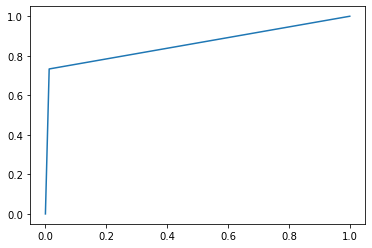

In [24]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### you can use imblearn package
- https://imbalanced-learn.org/stable/index.html

## K-means clustering

#### simple example

In [25]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_train, _ = make_blobs(random_state=1)
print("X_train.shape:", X_train.shape)

X_train.shape: (100, 2)


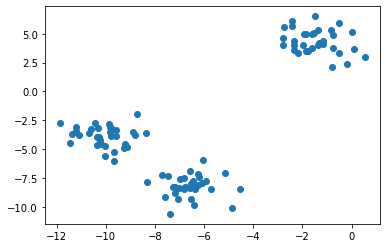

In [26]:
plt.scatter(X_train[:,0], X_train[:,1])

In [27]:
# varyng k 
n_clusters = 3
kmeans = KMeans(n_clusters= n_clusters)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [15]:
print(kmeans.cluster_centers_)

[[ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]
 [ -6.58196786  -8.17239339]]


In [16]:
assignments_X_train = kmeans.labels_
print(assignments_X_train)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [17]:
X_new, _ = make_blobs(random_state=100)

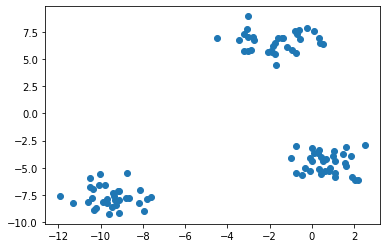

In [18]:
plt.scatter(X_new[:,0], X_new[:,1])
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

In [19]:
assignments_X_new = kmeans.predict(X_new)
print(assignments_X_new)

[0 2 0 1 2 2 0 0 2 1 0 2 0 0 0 0 0 2 1 2 0 0 2 2 0 2 2 0 0 1 2 0 2 2 2 0 2
 2 0 2 0 2 2 0 0 1 2 0 0 0 0 2 1 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 1 0 2 2 1 2
 0 0 2 0 0 2 2 2 0 0 2 2 0 2 2 0 1 0 0 2 0 0 2 0 0 2]


In [20]:
kmeans.transform(X_new)

array([[ 7.94843545, 10.39620533,  8.40344369],
       [15.27061194,  4.83636618,  2.94240672],
       [ 1.44809093, 12.54737313, 14.63958926],
       [13.09979763,  1.71889236,  4.31631792],
       [ 8.94362543, 10.60384341,  8.07182935],
       [13.19588137,  3.72823917,  1.90856235],
       [ 3.07691078, 14.55682172, 16.56401203],
       [ 1.9054229 , 12.98812209, 15.14000335],
       [ 8.54432106, 10.4603334 ,  8.14363442],
       [12.2212082 ,  2.09490335,  3.43894438],
       [ 8.89836287, 11.89891759,  9.44377098],
       [15.54566785,  5.39359276,  2.76030899],
       [ 2.24966984, 11.7999709 , 14.3329063 ],
       [ 8.14444811, 10.33673115,  8.24083085],
       [ 1.55153138, 13.27826777, 15.06424714],
       [ 2.85250361, 14.70391276, 16.25155282],
       [ 8.01926105, 11.67510741,  9.64123951],
       [14.76794242,  4.07147711,  3.14113133],
       [13.88097413,  2.69199139,  3.85575279],
       [ 9.12762522, 11.16931923,  8.55520098],
       [ 8.24101309, 12.57379053, 10.494

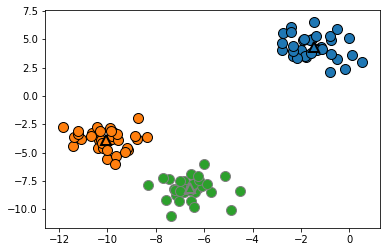

In [21]:
# visualize X_train
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments_X_train, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(n_clusters),
    markers='^', markeredgewidth=2)

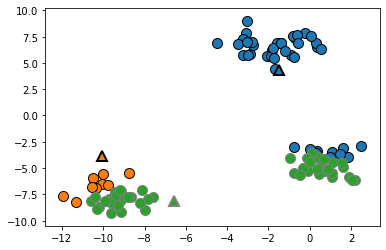

In [22]:
# visualize X_new
mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], assignments_X_new , markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(n_clusters),
    markers='^', markeredgewidth=2)

#### with iris dataset

In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X_train, y_train = iris.data, iris.target
print("X_train.shape:", X_train.shape)

X_train.shape: (150, 4)


numpy.ndarray

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [25]:
print(kmeans.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [26]:
assignments_X_train = kmeans.labels_
print(assignments_X_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


#### with iris dataset (with scaling)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_train, y_train = iris.data, iris.target
print("X_train.shape:", X_train.shape)

X_train.shape: (150, 4)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [5]:
# for interpretation 
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[6.78085106 3.09574468 5.5106383  1.97234043]
 [5.006      3.428      1.462      0.246     ]
 [5.80188679 2.67358491 4.36981132 1.41320755]]


In [7]:
print(kmeans.cluster_centers_)

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


In [6]:
assignments_X_train_scaled = kmeans.labels_
print(assignments_X_train_scaled)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Agglomerative Clustering

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X_train, _ = make_blobs(random_state=1)
print("X_train.shape:", X_train.shape)

X_train.shape: (100, 2)


In [9]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [10]:
assignments_X_train = agg.labels_
print(assignments_X_train)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Text(0, 0.5, 'Feature 1')

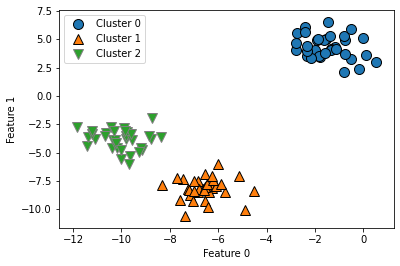

In [12]:
import mglearn
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments_X_train)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### no predict method in hierarchical clustering

#### you can draw dendrogram 
- https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

#### comparision between different linkage methods
- https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py